In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import re
import statistics
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def present(directory):
    
    global avg_scores 
    global max_scores
    global no_solutions

    avg_scores, max_scores, no_solutions = [[]], [[]], [[]]
    
    # access all folders in this dir
    for folder in os.listdir(directory + "/"):
        print("in folder: " + folder)
        for filename in os.listdir(directory + "/" + folder + "/"):
            if filename.startswith("archive"):
                i = int(re.search('archive_(.*).dat', filename).group(1))
                i = int(i / 50) + 1 # add 1 because we can have an archive as 'archive_0.dat'
                
                while(len(avg_scores) < i):
                    avg_scores.append([])
                while(len(max_scores) < i):
                    max_scores.append([])
                while(len(no_solutions) < i):
                    no_solutions.append([])
                    
                k,_,_,_,_,_,_,z,_,_,_,_,x,y,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_ = np.loadtxt(directory + "/" + folder + "/" + filename, unpack=True)
                avg_scores[i-1].append(statistics.mean(z))
                max_scores[i-1].append(max(z))
                no_solutions[i-1].append(len(z))
                
                
    if not os.path.exists(directory + "/plots/"):    
        os.mkdir(directory + "/plots/")
        
    global avg_lower 
    global avg_upper
    global mean_avg
    
    avg_lower, avg_upper, mean_avg = [],[],[]
    
    for i in range(len(avg_scores)):
        m,l,u = mean_confidence_interval(avg_scores[i])
        avg_lower.append(l)
        avg_upper.append(u)
        mean_avg.append(m)
        
    fig = plt.figure(figsize=(14,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    
    # axes.boxplot(avg_scores)
    axes.plot(mean_avg, 'g')
    x = np.linspace(0, len(mean_avg), len(mean_avg))
    axes.fill_between(x, avg_lower, avg_upper, color='lightgreen')
    plt.ylabel("avg covered distance in 5s")
    plt.xlabel("generation/50")
    axes.set_ylim([0,5])
    plt.savefig(directory + "/plots/avgscore.pdf")
    plt.show()

    global max_lower 
    global max_upper
    global mean_max
    
    max_lower, max_upper, mean_max = [],[],[]
    
    for i in range(len(max_scores)):
        m,l,u = mean_confidence_interval(max_scores[i])
        max_lower.append(l)
        max_upper.append(u)
        mean_max.append(m)
    
    fig = plt.figure(figsize=(14,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    #axes.boxplot(max_scores)
    axes.plot(mean_max, 'k-')
    x = np.linspace(0, len(mean_max), len(mean_max))
    axes.fill_between(x, max_lower, max_upper)
    axes.set_ylim([0,5])
    plt.ylabel("max covered distance in 5s")
    plt.xlabel("generation/50")
    plt.savefig(directory + "/plots/maxscore.pdf")
    plt.show()

    global no_lower 
    global no_upper
    global mean_no
    
    no_lower, no_upper, mean_no = [],[],[]
    
    for i in range(len(no_solutions)):
        m,l,u = mean_confidence_interval(no_solutions[i])
        no_lower.append(l)
        no_upper.append(u)
        mean_no.append(m)
    
    fig = plt.figure(figsize=(20,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    # axes.boxplot(no_solutions)
    axes.plot(mean_no, 'k-')
    x = np.linspace(0, len(mean_no), len(mean_no))
    axes.fill_between(x, no_lower, no_upper)
    plt.ylabel("no solutions")
    plt.xlabel("generation/50")
    plt.savefig(directory + "/plots/numsolutions.pdf")
    plt.show()


in folder: rhex_text_2019-07-19_17_05_28_2553
in folder: rhex_text_2019-07-19_17_49_54_2237
in folder: rhex_text_2019-07-19_17_18_39_14139
in folder: plots
in folder: rhex_text_2019-07-19_16_14_07_19388
in folder: rhex_text_2019-07-19_15_22_31_12850


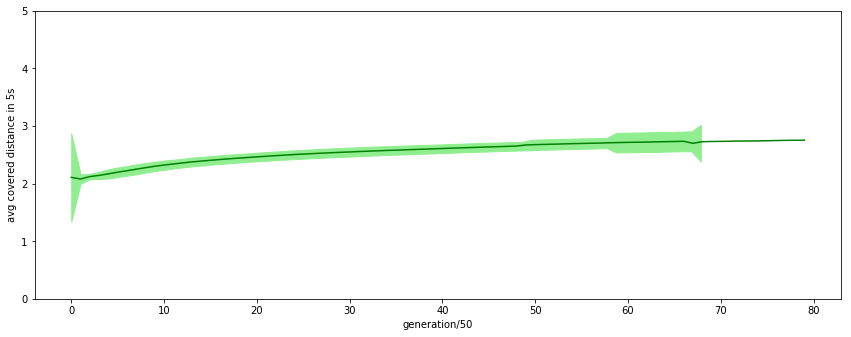

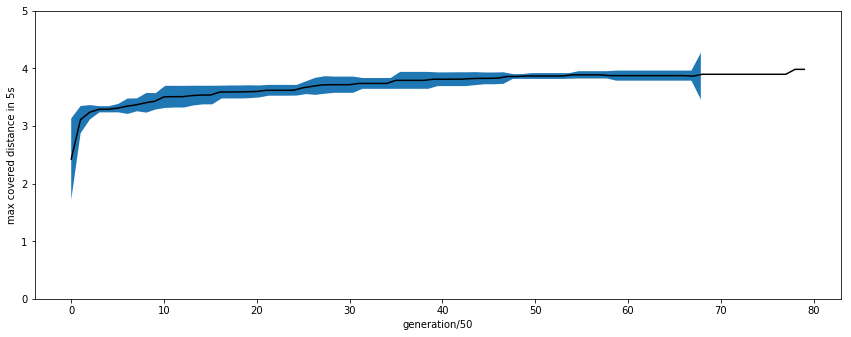

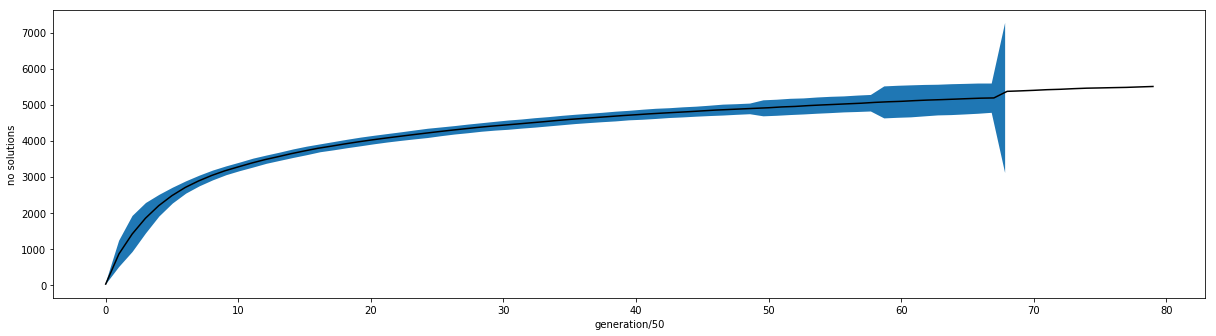

In [43]:
present("2307")